# Introduction
***
#### Data Science Project by Aidan Norton <br>
In this project, we will look at the sport of powerlifting. We will aim to answer the following three questions: <br>
- How is an individuals bodyweight correlated to their max bench press?
- Are Males/Females Relatively Better at a Given Exercise Compared to one Another?
- Is using Equipment Shown to be Significantly Helpful for Lifts?
### Powerlifting

Powerlifting is a competitive sport where each competitor gives their all to lift as much weight as they can with 1 repetition. <br>
There are three main exercises in powerlifting that are staples in measuring one's strength:
- Squat
- Deadlift
- Bench Press <br>
Each individual who performs at a powerlifting meet primarily performs at least a couple of these exercises. Each exercise is performed usually 3 times, and each participant's score is their best lift out of those few. <br> Whoever can lift the most weight combined across the three exercises in their weight/age class is regarded as the winner. <br>
### Dataset
We have a dataset consisting of hundreds of thousands of records of individuals' performance at powerlifting meets. <br>
There are many columns that record information about each participant's performance, such as their age, sex, weight, bench press, deadlift, squat; this dataset is an aggregation of many powerlifting meets across many years, so there is also information about the powerlifting meet dates, location, and event names. <br>
We will finally filter the squat/deadlift/bench records to focus only on the best out of three for each participant who went to meets that scored based on 3 attempts for each.

In [1]:
# import everything
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("C:/Users/Aidan/repositories/data_science/data/powerlifting.csv") # read our powerlifting dataset
df.head() # show first few records in dataset

C:\Users\Aidan\AppData\Local\Temp\ipykernel_37356\777955642.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Aidan/repositories/data_science/data/powerlifting.csv") # read our powerlifting dataset


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Dominik Gabriel,M,B,Raw,17.0,16-17,14-18,T 16-17,102.5,110,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
1,Marek Herák,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,59.8,60,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
2,Miroslav Adamove,M,B,Multi-ply,18.0,18-19,14-18,T 18-19,87.7,90,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
3,Kamil Lipiňski,M,B,Multi-ply,19.0,18-19,19-23,T 18-19,89.5,90,...,NaN,Poland,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships
4,Gabriel Kováč,M,B,Multi-ply,20.0,20-23,19-23,Juniors,81.6,82.5,...,NaN,Slovakia,NaN,WUAP,WUAP,2015-06-16,Czechia,NaN,Praha,European Championships


# Feature Engineering
***
<tab>For this dataset, there is a lot of columns that we do not need, and are irrelevant in the context of the goal of this project. We can start by excluding a numerous selection of columns such as the meet location information and dates. We want to keep only the ones we need to answer the three questions. <br>
Further down the line, we can fine tune our dataset further to meet the specific needs of each question.

In [3]:

irrelevant_columns = [
                        'Event',
                        'BirthYearClass',
                        'Tested',
                        'Country',
                        'State',
                        'Federation',
                        'ParentFederation',
                        'Date',
                        'MeetCountry',
                        'MeetState',
                        'MeetTown',
                        'MeetName',
                        'AgeClass',
                        'Goodlift',
                        'Wilks',
                        'Glossbrenner',
                        'Division',
                        'Place',
                        'Squat1Kg',
                        'Squat2Kg',
                        'Squat3Kg',
                        'Squat4Kg',
                        'Bench1Kg',
                        'Bench2Kg',
                        'Bench3Kg',
                        'Bench4Kg',
                        'Deadlift1Kg',
                        'Deadlift2Kg',
                        'Deadlift3Kg',
                        'Deadlift4Kg',
                        'WeightClassKg']
df = df.drop(irrelevant_columns, axis=1) # drop irrelevant columns

# Methods
***
### Tools
Python is a great programming language for data science with a powerful selection of libraries that help with data visualization and manipulation. <br>
In this project, we will be using a few standout libraries to help:
- Pandas: Data manipulation and storage
- Seaborn: Data visualization <br>
We can use features like scatterplots to visualize our data, and correlation matrixes to see how different features are correlated to one another.

# Questions
***
### 1) How is an individuals bodyweight correlated to their max bench press?
Intuitively, it can be predicted that as an individual's bodyweight increases, their strength will also increase. The bench press is a great exercise to measure raw strength. <br>
For this question, we will reduce the dataset to specify males between the age of 18-35 for consistency.

<Axes: xlabel='BodyweightKg', ylabel='Best3BenchKg'>

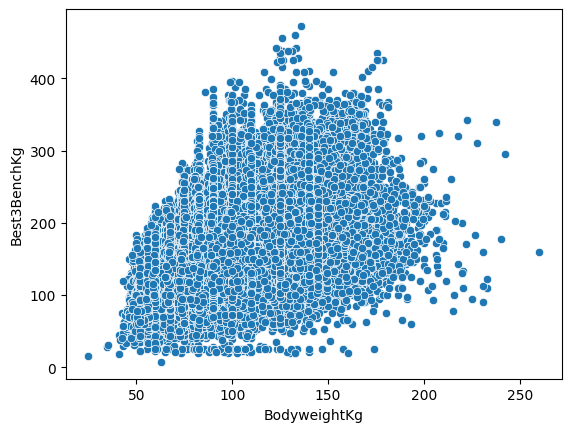

In [18]:
df_q1 = df
df_q1 = df_q1.loc[df['Best3BenchKg'] > 0] # filter out failed bench press attempts - these are stored as negative values in the dataset
df_q1 = df_q1.loc[df['Best3SquatKg'] > 0] # filter out failed squat attempts
df_q1 = df_q1.loc[df['Best3DeadliftKg'] > 0] # filter out failed deadlift attempts
df_q1 = df_q1.loc[(df['Age'] >= 18) & (df['Age'] <= 35)] # filter age
df_q1 = df_q1.drop(['Equipment'], axis=1) # also drop equipment for consistency - only include competitors who did not use equipment (lifting straps)
df_q1 = df_q1.drop(['Dots'], axis=1)
df_q1 = df_q1.loc[df['Sex'] == 'M'] # filter sex
sb.scatterplot(data=df_q1, x='BodyweightKg', y='Best3BenchKg') # plot

In [19]:
df_q1.corr(numeric_only=True)

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
Age,1.000000,0.225205,0.205086,0.269773,0.239588,0.249412
BodyweightKg,0.225205,1.000000,0.540415,0.556369,0.535247,0.579624
Best3SquatKg,0.205086,0.540415,1.000000,0.851742,0.831662,0.966352
Best3BenchKg,0.269773,0.556369,0.851742,1.000000,0.745666,0.917017
Best3DeadliftKg,0.239588,0.535247,0.831662,0.745666,1.000000,0.917913
TotalKg,0.249412,0.579624,0.966352,0.917017,0.917913,1.000000


From the correlation cofficients, we can see that the correlation between Bodyweight (KG) and the bench press is about 0.556. This indicates a good positive correlation between the two. 

### 2) Are Males/Females Relatively Better at a Given Exercise Compared to one Another?
To answer this question, we can once again look at the correlation coefficients. We can split the data into two sets for male and female, and compare how each exercise contributes to their overall score. <br>
Once again, we look only at competitors between the age 18-35.


In [24]:
male = df.loc[df['Sex'] == 'M']
female = df.loc[df['Sex'] == 'F']
male = male.drop(['Dots'], axis=1)
female = female.drop(['Dots'], axis=1)
male.corr(numeric_only=True)

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
Age,1.000000,0.221099,0.077911,0.158146,0.086744,-0.120269
BodyweightKg,0.221099,1.000000,0.534780,0.550320,0.510453,0.275292
Best3SquatKg,0.077911,0.534780,1.000000,0.826034,0.837017,0.944659
Best3BenchKg,0.158146,0.550320,0.826034,1.000000,0.786057,0.286525
Best3DeadliftKg,0.086744,0.510453,0.837017,0.786057,1.000000,0.749116
TotalKg,-0.120269,0.275292,0.944659,0.286525,0.749116,1.000000


In [27]:
female.corr(numeric_only=True)

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
Age,1.000000,0.152684,-0.016844,0.106748,0.100446,-0.087852
BodyweightKg,0.152684,1.000000,0.385433,0.338775,0.366626,0.289820
Best3SquatKg,-0.016844,0.385433,1.000000,0.814142,0.821196,0.945549
Best3BenchKg,0.106748,0.338775,0.814142,1.000000,0.780781,0.408054
Best3DeadliftKg,0.100446,0.366626,0.821196,0.780781,1.000000,0.805085
TotalKg,-0.087852,0.289820,0.945549,0.408054,0.805085,1.000000


Looking at the correlation coefficients beteen TotalKg and each exercise, we can see a big jump in regards to the bench press between males and females. The correlation between total weight lifted and bench press is .41 for females, compared to .29 for males. The deadlift is also up a bit by .06 for females as well. From this, we can say that the bench press is a relatively more important exercise for determining a female contestant's performance compared to a male contestant.

### 3) Is using Equipment Shown to be Significantly Helpful for Lifts?
By splitting the data into two sets, those who use equipment, and those who don't, and comparing the Dots, we can see if using equipment is shown to have any significant benefit. <br>
Dots is a measurement technique in powerlifting to compare relative strength to bodyweight.

In [17]:
with_equipment = df.loc[df['Equipment'] != 'Raw']
without_equipment = df.loc[df['Equipment'] == 'Raw']
dots_equipment = with_equipment.loc[:, 'Dots'].mean()
dots_no_equipment = without_equipment.loc[:, 'Dots'].mean()
print("Average Dots (Equipment):{}\nAverage Dots (No Equipment):{}".format(dots_equipment, dots_no_equipment))

Average Dots (Equipment):303.4430788262766
Average Dots (No Equipment):226.04974992489278


It is conclusive that using equipment boosts powerlifting performance, with equipment giving a 34% increase.

# Conclusion
***
Powerlifting is an exciting sport, and it offers an extensive data source for researching raw human strength and performance of staple exercises like the bench press, deadlift, and squat. From powerlifting, we can draw meaningful conclusions that can be applied not to just powerlifting, but to lifting weights in general. Casual lifters can use this data to figure out how to improve their lifts, for example, how they can improve their bench press, and whether they should use equipment or not.